In [1]:
from cetsp_bnb2 import Circle, Instance, branch_and_bound, Point

# create some instance
instance = Instance([Circle(Point(x, y), 0.5) for x in range(0, 5) for y in range(0, 5)])

# solve instance
tour, lb, stats = branch_and_bound(instance, lambda e: None)


Using node simplification.
Exploring on 8 threads
Branching on farthest circle.
Set parameter Username
Academic license - for non-commercial use only - expires 2023-11-13
Using GlobalConvexHullRule
Using DfsBfs search
Starting with root node of size 4
i	LB	|	UB	|	Time
1	13.8222	|	inf	|	0.002s
2	13.8222	|	inf	|	0.003s
3	13.8222	|	inf	|	0.005s
4	13.8222	|	inf	|	0.008s
5	13.8222	|	inf	|	0.011s
6	13.8222	|	inf	|	0.017s
7	13.8222	|	inf	|	0.023s
8	13.8222	|	inf	|	0.031s
9	13.8222	|	inf	|	0.038s
10	13.8222	|	14.4465	|	0.038s
20	14.2934	|	14.4465	|	0.048s
---------------
26	14.3821	|	14.4465
26 iterations with 20 nodes explored and 19 branches.


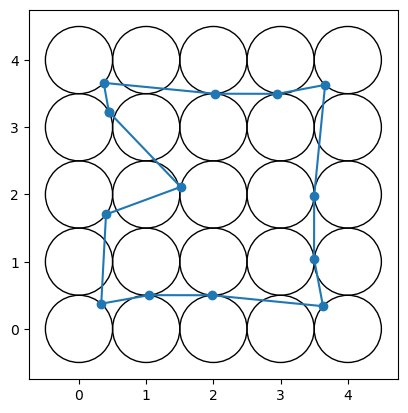

In [2]:

# access and plot solution
import matplotlib.pyplot as plt


def plot_circle(ax: plt.Axes, circle: Circle, **kwargs):
    patch = plt.Circle(
        (circle.center.x, circle.center.y), radius=circle.radius, **kwargs
    )
    ax.add_patch(patch)


def plot_solution(ax: plt.Axes, instance, solution, highlight=None):
    trajectory = solution.get_trajectory()
    for i, c in enumerate(instance.circles()):
        if highlight and i in highlight:
            plot_circle(ax, c, facecolor="white", zorder=1, ec="green", fill=False)
        elif trajectory and trajectory.distance(c) <= 0.01 * c.radius:
            plot_circle(ax, c, facecolor="white", zorder=1, ec="black", fill=False)
        else:
            plot_circle(ax, c, facecolor="white", zorder=1, ec="red", fill=False)

    tour = [trajectory[i] for i in range(len(trajectory))]
    ax.plot([p.x for p in tour], [p.y for p in tour], "o-")
    ax.set_aspect("equal", "box")


plt.figure()
plot_solution(plt.gca(), instance, tour)
plt.show()